In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import odeint
import scipy

In [2]:
def toggle_switch(yz, t, beta_y, beta_z, n_x, n_y, Km1, Km2, delta):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    # Unpack y and z
    y, z = yz

    # Compute dy/dt
    dy_dt = beta_y/ (1 + (z/Km1)**n_x) - delta*y
    
    # Compute dz/dt
    dz_dt = beta_z/ (1 + (y/Km2)**n_y) - delta*z
    
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [3]:
def general_toggle_switch(yz, t, *args):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    #args = (np.array(args).reshape(2, 6))
    args1 = np.array([args[0], args[1], args[2], args[3], args[4], args[5], args[6], args[7]])
    args2 = np.array([args[8], args[9], args[10], args[11], args[4], args[5], args[12], args[13]])
    
    # Unpack y and z
    y, z = yz
    
    # Compute dy/dt
    dy_dt = generalized_hill_function(yz, args1) - args1[7]*y
    
    # Compute dz/dt
    dz_dt = generalized_hill_function(yz, args2) - args2[7]*z
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [4]:
def generalized_hill_function(y, args):
    a1    = args[0]
    a2    = args[1]
    b1    = args[2]
    b2    = args[3]
    n1    = args[4]
    n2    = args[5]
    beta  = args[6]
    x1, x2= y
    return beta*(1 + a1*x1**n1 + a2*x2**n2)/(1 + b1*x1**n1 + b2*x2**n2)

In [5]:
def residuals(p):
    p = tuple(p)
    sim_P = odeint(general_toggle_switch, iv, t, args = p).T
    #print(sim_P)
    res = (sim_P - exp_P)**2
    #print(np.sum(res.flatten()**2))
    return res.flatten()

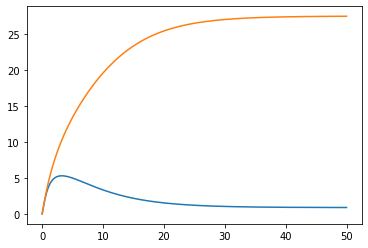

In [40]:
# Number of time points we want for the solutions
n = 800

# Time points we want for the solution
t = np.linspace(0, 50, n)

# Initial condition
iv = yz_0 = np.array([0.0, 0.0])

# Parameters
beta_y = 5.0
beta_z = 5.0
n_x = 2
n_y = 2
x_0 = 2.0
Km1 = 5
Km2 = 10
delta = 0.18


# Package parameters into a tuple
args = (beta_y, beta_z, n_x, n_y, Km1, Km2, delta)

# Integrate ODES
yz_og = scipy.integrate.odeint(toggle_switch, yz_0, t, args=args).T

y_og, z_og = yz_og[0], yz_og[1]

plt.plot(t, y_og)
plt.plot(t, z_og)

y_og_scaled = []
z_og_scaled = []

for i in range(0, len(y_og)):
    y_og_scaled.append((y_og[i] - np.mean(y_og))/np.std(y_og))
    z_og_scaled.append((z_og[i] - np.mean(z_og))/np.std(z_og))

yz_scaled = np.array(list(zip(y_og_scaled, z_og_scaled))).T

In [54]:
exp_P = yz_og#yz_scaled# + np.random.randn(len(yz_og))*0.5
exp_P = exp_P#[::5]

In [55]:
initial_guess = [2, 2, 5, 3, 4, 2, 5, 3, 7, 2, 4, 5, 7, 3]
fitted_params = least_squares(residuals, initial_guess, bounds=(0, np.inf), method = 'trf', max_nfev=10000, verbose=2, ftol=1e-012, xtol=1e-012).x

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2061e+08                                    2.13e+07    
       1              2         1.6933e+06      1.19e+08       1.31e+01       3.55e+06    
       2              4         1.2833e+06      4.10e+05       2.84e+00       5.32e+06    
       3              5         9.4117e+05      3.42e+05       1.85e+00       2.50e+06    
       4              6         6.7674e+05      2.64e+05       7.60e+00       3.99e+05    
       5              9         5.9863e+05      7.81e+04       6.62e-01       1.25e+06    
       6             10         4.7468e+05      1.24e+05       8.90e-01       1.04e+06    
       7             11         2.2858e+05      2.46e+05       1.84e+00       4.10e+06    
       8             13         9.0254e+04      1.38e+05       6.72e-01       2.32e+06    
       9             14         3.5149e+04      5.51e+04       8.10e-01       6.42e+05    

      91             119        1.8217e-01      2.06e-04       1.73e-01       3.12e+00    
      92             120        1.8197e-01      1.98e-04       1.72e-01       3.10e+00    
      93             121        1.8179e-01      1.85e-04       1.71e-01       3.13e+00    
      94             122        1.8160e-01      1.86e-04       1.71e-01       3.02e+00    
      95             123        1.8133e-01      2.76e-04       1.96e-01       4.18e-01    
      96             125        1.8123e-01      1.00e-04       8.66e-02       1.81e+00    
      97             126        1.8112e-01      1.03e-04       9.36e-02       1.15e+00    
      98             127        1.8104e-01      8.24e-05       1.81e-01       2.93e+00    
      99             128        1.8097e-01      6.82e-05       1.64e-01       3.98e+00    
      100            129        1.8077e-01      2.01e-04       4.98e-02       1.28e+01    
      101            130        1.8068e-01      9.13e-05       9.24e-02       1.00e+00    

      183            243        1.7438e-01      1.24e-04       3.65e-01       6.71e-01    
      184            245        1.7425e-01      1.29e-04       3.97e-01       6.95e+00    
      185            246        1.7413e-01      1.23e-04       3.45e-01       3.27e+00    
      186            247        1.7393e-01      2.02e-04       1.32e+00       1.78e+01    
      187            249        1.7374e-01      1.83e-04       2.89e-01       1.16e+00    
      188            251        1.7369e-01      4.82e-05       6.41e-02       3.32e+00    
      189            252        1.7363e-01      6.60e-05       1.94e-01       9.73e+00    
      190            253        1.7354e-01      9.23e-05       2.00e-01       6.43e-01    
      191            254        1.7334e-01      1.99e-04       8.20e-01       4.94e-01    
      192            257        1.7329e-01      4.52e-05       5.79e-02       3.71e+00    
      193            258        1.7322e-01      7.39e-05       2.18e-01       8.00e+00    

      276            368        1.6770e-01      5.56e-05       4.64e-02       9.71e-01    
      277            369        1.6768e-01      2.14e-05       1.26e-02       3.48e+00    
      278            370        1.6764e-01      3.75e-05       6.02e-02       1.41e+00    
      279            371        1.6759e-01      4.72e-05       6.04e-02       9.56e+00    
      280            372        1.6752e-01      7.77e-05       3.55e-01       2.35e-01    
      281            374        1.6747e-01      4.32e-05       5.31e-02       8.08e+00    
      282            375        1.6740e-01      7.36e-05       3.57e-01       2.38e-01    
      283            378        1.6738e-01      2.14e-05       1.20e-02       1.24e+00    
      284            379        1.6734e-01      3.65e-05       4.89e-02       2.29e+00    
      285            380        1.6731e-01      3.16e-05       6.42e-02       1.23e+01    
      286            381        1.6724e-01      6.88e-05       1.89e-01       6.45e-01    

      369            493        1.6327e-01      4.27e-05       9.84e-02       7.05e+00    
      370            494        1.6322e-01      4.39e-05       1.30e-01       4.60e+00    
      371            495        1.6317e-01      5.88e-05       8.85e-02       4.51e+00    
      372            496        1.6312e-01      4.82e-05       5.11e-01       8.29e+00    
      373            497        1.6300e-01      1.15e-04       1.68e-01       1.98e+01    
      374            498        1.6293e-01      6.86e-05       6.01e-01       1.18e+01    
      375            499        1.6284e-01      8.88e-05       2.04e+00       2.66e+00    
      376            502        1.6275e-01      9.46e-05       4.02e-02       2.56e+01    
      377            503        1.6271e-01      4.52e-05       3.90e-02       6.70e+00    
      378            504        1.6266e-01      4.51e-05       4.33e-02       5.23e+00    
      379            505        1.6261e-01      4.85e-05       9.67e-02       8.86e+00    

      462            617        1.5653e-01      1.09e-04       8.89e-02       2.14e+00    
      463            618        1.5647e-01      5.61e-05       1.14e-01       1.78e+01    
      464            619        1.5623e-01      2.40e-04       1.95e-01       2.20e+00    
      465            620        1.5599e-01      2.35e-04       9.79e-02       1.60e+01    
      466            622        1.5582e-01      1.73e-04       6.07e-02       5.70e+01    
      467            624        1.5573e-01      8.73e-05       2.35e-02       4.68e+00    
      468            625        1.5559e-01      1.41e-04       4.16e-02       3.68e+00    
      469            626        1.5538e-01      2.15e-04       9.26e-02       2.21e+01    
      470            628        1.5534e-01      4.08e-05       4.23e-02       7.61e+01    
      471            629        1.5517e-01      1.69e-04       1.75e-02       2.73e+00    
      472            630        1.5510e-01      6.98e-05       1.03e-02       4.92e+00    

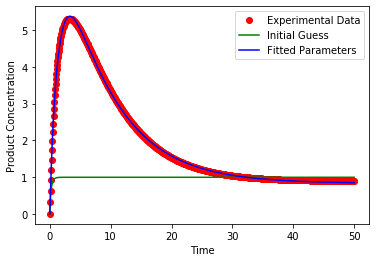

In [56]:
plt.plot(t, exp_P[0], 'ro')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(fitted_params)).T[0], 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

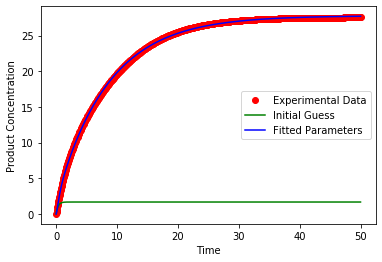

In [57]:
plt.plot(t, exp_P[1], 'ro')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[1], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(fitted_params)).T[1], 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

In [58]:
a1_node1 = fitted_params[0]
b1_node1 = fitted_params[1]
a2_node1 = fitted_params[2]
b2_node1 = fitted_params[3]
n1 = fitted_params[4]
n2 = fitted_params[5]
beta_node1 = fitted_params[6]
delta_node1 = fitted_params[7]

a1_node2 = fitted_params[8]
b1_node2 = fitted_params[9]
a2_node2 = fitted_params[10]
b2_node2 = fitted_params[11]
beta_node2 = fitted_params[12]
delta_node2 = fitted_params[13]



In [59]:
from IPython.display import Latex

Latex('$\\frac{1+'+str(int(a1_node2))+'x_1^{'+str(int(n1))+'}+'+str(int(a2_node2))+'x_2^{'+str(int(n2))+'}}{1+'+str(int(b1_node2))+'x_1^{'+str(int(n1))+'}+'+str(int(b2_node2))+'x_2^{'+str(int(n2))+'}}$')

<IPython.core.display.Latex object>

In [60]:
Latex('$\\frac{1+'+str(int(a1_node1))+'x_1^{'+str(int(n1))+'}+'+str(int(a2_node1))+'x_2^{'+str(int(n2))+'}}{1+'+str(int(b1_node1))+'x_1^{'+str(int(n1))+'}+'+str(int(b2_node1))+'x_2^{'+str(int(n2))+'}}$')

<IPython.core.display.Latex object>

In [61]:
from IPython.display import Latex

Latex('$ \dot{x_2} = '+str((a1_node2))+'\\frac{1+'+str((a1_node2))+'x_1^{'+str((n1))+'}+'+str((a2_node2))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node2))+'x_1^{'+str((n1))+'}+'+str((b2_node2))+'x_2^{'+str((n2))+'}} - ' + str(delta_node2)+'x_2$')

<IPython.core.display.Latex object>

In [62]:
Latex('$ \dot{x_1} = '+str((a1_node1))+'\\frac{1+'+str((a1_node1))+'x_1^{'+str((n1))+'}+'+str((a2_node1))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node1))+'x_1^{'+str((n1))+'}+'+str((b2_node1))+'x_2^{'+str((n2))+'}} - ' + str(delta_node1)+'x_1 $')

<IPython.core.display.Latex object>

In [63]:
fitted_params

array([8.46664238e-05, 3.36180363e-07, 8.99068497e-02, 1.87257701e-05,
       1.99942372e+00, 5.40462973e+00, 5.54025659e+00, 1.25370493e-01,
       6.28640477e+01, 4.20157214e-01, 1.55505069e+01, 1.81766997e-01,
       1.41239391e+00, 1.17546700e-01])